using hydrochemistry and simple visualization to differentiate groundwater samples
===

presented in 2018 International ITB Geothermal Workshop 
21 - 22 Maret 2018

authors:

- Dasapta Erwin Irawan [ORCID](https://orcid.org/0000-0002-1526-0863) [Google Scholar]()
- Arif Susanto [Google Scholar](https://scholar.google.co.id/citations?hl=en&user=zymmkxUAAAAJ&view_op=list_works&sortby=pubdate)
- Prihadi Sumintadireja [Google Scholar](https://scholar.google.co.id/citations?user=G3uiPMoAAAAJ&hl=en)
- Budi Brahmantyo [Google Scholar](https://scholar.google.co.id/citations?user=t7CtT5MAAAAJ&hl=en&oi=ao)
- Deny Juanda Puradimaja [Google Scholar](https://scholar.google.co.id/citations?user=-Z9rgsQAAAAJ&hl=en&oi=ao)

![itb](itb.png)

**Faculty of Earth Sciences and Technology**

**Institut Teknologi Bandung**

# before you continue

this talk **is not** about: 

- **geology**, but how to differentiate the geology.
- **geothermal**, but you may look at your data differently.
- **results**, but methods.

![geology](geology.png)

# introduction

- we have lots of data.
- we know they are different but don't how to visualize the difference.
- if we know how to do it, we don't have the skills and tools.
- here we are proposing a new way to look at your data using **free tools** with a bit of programming skills.

![free_wifi_flickr_cc0](freeflickr.jpg)

## but we do have spreadsheet

yes, but with some limitations:

- it's cell-based, you have to scroll you way to get what you want.
- it's limited ability to visualize your data.
- it has reproducibility issues: versioning, _point and click_, copy and paste to your show the results.

![xls](xls.png)

## I like it but I don't have programming skills

- it's not that hard.
- many **good people** share their work (including codes). 
- the **difficulties** are not comparable to the **coolness**. :-)

![code_screen_pexels_cc0](codepexels.jpeg)

## why codes?

- **it's reproducible**: people can get the same results from the same code and data, with no copy-pasting.
- **it's not only about the results**: but also the process. you can learn the process step by step.
- it's about **pretty-informative** visualization

![code_mug_pixabay_cc0](codemug.png)

# what do we need?

you may choose on or both:
    
- `python` installation [Anaconda installation instruction](https://conda.io/docs/installation.html) [on Youtube](https://www.youtube.com/watch?v=YJC6ldI3hWk) or
- `R`installation [instructions](a-little-book-of-r-for-time-series.readthedocs.io/en/latest/src/installr.html) or [on Youtube](https://www.youtube.com/watch?v=cX532N_XLIs)
- in this case we use `python` with its `pandas` package

![python](python.jpg) 
![jupyter notebook](jupyter.png) 
![R](rlogo.jpg) 
![GitHub](github.png) 


Kami menggunakan `Python-Pandas` karena `Pandas` adalah `python library` yang lengkap, mudah digunakan, dan seperti halnya `R`, `Pandas` memiliki basis pengguna yang sangat banyak dan berkomitmen untuk membagikan ilmu dan pengetahuannya. Karena ini, Anda dapat menemukan dengan mudah berbagai tutorial berbasis teks atau video di internet. Sebelum menggunakannya, maka Anda akan perlu mengunduh dan menginstalasi `Python` dan `Pandas` yang kami tulis dalam tutorial terpisah.

Tutorial ini akan terkait dengan: 

- artikel kami berjudul" `Using hydrochemistry and simple visualisation to differentiate groundwater samples`
- penulis: Dasapta Erwin Irawan, Arif Susanto, Prihadi Sumintadireja, Budi Brahmantyo, Deny Juanda Puradimaja
- event: ITB International Geothermal Workshop ITB
- organizer: Faculty of Mining and Petroleum Engineering
- references: 

    - [Codebasics Youtube Channel](https://www.youtube.com/channel/UCh9nVJoWXmFb7sLApWGcLPQ) 
    - [Pandas 0.22.0 documentation](https://pandas.pydata.org/pandas-docs/stable/)
    - [A little book of Python for multivariate analysis](http://python-for-multivariate-analysis.readthedocs.io/)
    - [Sebastian Raschka's PCA tutorial](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
    - [Jason Brownlee's MachineLearningMastery Blog](https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/)
    - [Jupyter Notebook documentation](http://jupyter-notebook.readthedocs.io/)

# loading libraries

we will use the following libraries: 
- `pandas` and `numpy` for numerical calculation, 
- `matplotlib`and `seaborn` for plotting, and 
- `scikitlearn` for the PCA and other machine learning techniques.

In [74]:
import pandas as pd # loading Pandas on to memory
from pandas.tools.plotting import scatter_matrix
import numpy as np # loading Numpy library on to memory
import matplotlib.pyplot as plt # loading plotting library on to memory
%matplotlib inline
import seaborn as sns # loading seaborn library
# loading some functions from sklearn
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

# data description

we use:

- `describe()` 
- `boxplot` 
- `scatter plot matrix`

# Deskripsi data 

Kami menggunakan fungsi describe() dan boxplot untuk mengevaluasi data. Selain itu scatter plot matrix juga digunakan untuk mengetahui korelasi antar parameter.

In [11]:
df = pd.read_csv('data_arifs_2.csv') # loading data

## head and tail

- we could see the first 5 lines using `foo.head()` and the last 5 lines using `foo.tail()`.  
- we need to see the type of data using `type(foo)` command.
- checking the dimension or shape of the data (sum of rows and columns) using `foo.shape` command.
- Change `foo` with your own data frame.

In [12]:
df.head() # showing first 5 rows

,sample,litho,elev,turb,col,dhl,tds,ph,hard,ca,...,na,li,nh4,co3,hco3,cl,so4,no2,no3,source
0,Pang1,volc,850,0.6,0,98,68,6.9,45.4,13.9,...,9.7,0.0,0.5,0.00,76.3,3.5,0.00,0.0,0.3,Susanto (2017)
1,Pang2,volc,850,6.1,24,91,60,6.8,42.1,15.8,...,9.2,0.0,0.3,0.00,69.5,5.1,1.40,0.0,0.0,Irawan et al. (2015)
2,Bdg1,volc,700,0.5,0,210,200,6.0,55.0,14.2,...,10.1,0.0,0.8,0.05,72.0,110.0,0.08,0.1,1.2,Irawan et al. (2015)
3,Bdg2,volc,700,0.4,0,230,200,6.0,53.0,13.9,...,10.2,0.0,0.8,0.04,73.0,112.0,0.09,0.2,1.1,Irawan et al. (2015)
4,Bdg3,volc,625,0.4,0,240,210,6.3,54.0,14.0,...,9.5,0.0,0.9,0.10,73.5,121.0,0.07,0.2,1.2,Irawan et al. (2015)


In [13]:
df.tail() # showing last 5 rows

,sample,litho,elev,turb,col,dhl,tds,ph,hard,ca,...,na,li,nh4,co3,hco3,cl,so4,no2,no3,source
15,Indra1,alluv,8,2.0,0,1200,1180,6.1,81.0,10.1,...,6.1,0.0,2.3,4.3,91.0,890.0,1.2,0.6,2.1,Irawan et al. (2016)
16,Indra2,alluv,8,2.1,0,1200,1150,6.1,80.0,9.8,...,6.2,0.0,2.2,4.4,92.3,880.0,1.1,0.6,2.2,Irawan et al. (2016)
17,Indra3,alluv,5,2.1,0,1250,1200,6.0,81.0,9.3,...,6.2,0.0,2.5,4.2,94.5,910.0,1.2,0.5,3.4,Irawan et al. (2016)
18,Indra4,alluv,4,2.0,0,1300,1250,6.0,82.0,9.6,...,6.3,0.0,2.5,4.4,95.4,920.0,1.5,0.7,3.4,Irawan et al. (2016)
19,Indra5,alluv,4,1.8,0,1300,1250,6.0,82.0,9.7,...,6.7,0.0,2.6,4.3,92.3,910.0,1.4,0.8,3.5,Irawan et al. (2016)


In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df.shape # table size showing number of (rows, columns)

(20, 24)

In [16]:
df.describe() # selecting columns in number and describe basics stats

,elev,turb,col,dhl,tds,ph,hard,ca,mg,fe3,...,k,na,li,nh4,co3,hco3,cl,so4,no2,no3
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,484.950000,2.550000,1.200000,606.500000,572.400000,6.100000,74.725000,14.950000,1.065000,0.835000,...,2.990000,7.755000,0.0,1.160000,13.892500,81.165000,279.620000,0.464000,0.340000,1.310000
std,294.422267,2.551883,5.366563,420.275661,415.048431,0.279096,26.805398,4.439239,0.419618,0.198667,...,0.906642,2.123918,0.0,0.867179,40.204939,8.225332,372.257285,0.570571,0.216187,1.107344
min,4.000000,0.300000,0.000000,91.000000,60.000000,5.800000,42.100000,9.300000,0.600000,0.000000,...,1.600000,5.000000,0.0,0.100000,0.000000,69.500000,3.500000,0.000000,0.000000,0.000000
25%,437.000000,0.400000,0.000000,252.000000,210.000000,6.000000,53.750000,12.875000,0.800000,0.870000,...,2.300000,5.900000,0.0,0.300000,0.087500,74.825000,15.925000,0.080000,0.200000,0.300000
50%,597.500000,1.900000,0.000000,575.000000,547.500000,6.000000,67.500000,14.050000,0.900000,0.880000,...,2.850000,7.950000,0.0,1.000000,2.150000,79.100000,120.650000,0.085000,0.300000,1.200000
75%,606.250000,6.000000,0.000000,787.500000,745.000000,6.100000,86.500000,16.850000,1.200000,0.900000,...,3.600000,9.725000,0.0,1.675000,7.800000,86.500000,327.625000,1.125000,0.425000,1.575000
max,850.000000,6.500000,24.000000,1300.000000,1250.000000,6.900000,120.000000,23.000000,2.600000,0.920000,...,4.400000,10.300000,0.0,2.600000,182.000000,95.400000,920.000000,1.500000,0.800000,3.500000


In [17]:
list(df)

['sample',
 'litho',
 'elev',
 'turb',
 'col',
 'dhl',
 'tds',
 'ph',
 'hard',
 'ca',
 'mg',
 'fe3',
 'mn',
 'k',
 'na',
 'li',
 'nh4',
 'co3',
 'hco3',
 'cl',
 'so4',
 'no2',
 'no3',
 'source']

# creating boxplot

- here we create a boxplot to visualize the distribution of dataset.
- we're going to make two kinds of layout. 

In [18]:
df.boxplot(figsize=[20,10]) # creating boxplot
plt.savefig('box.png')

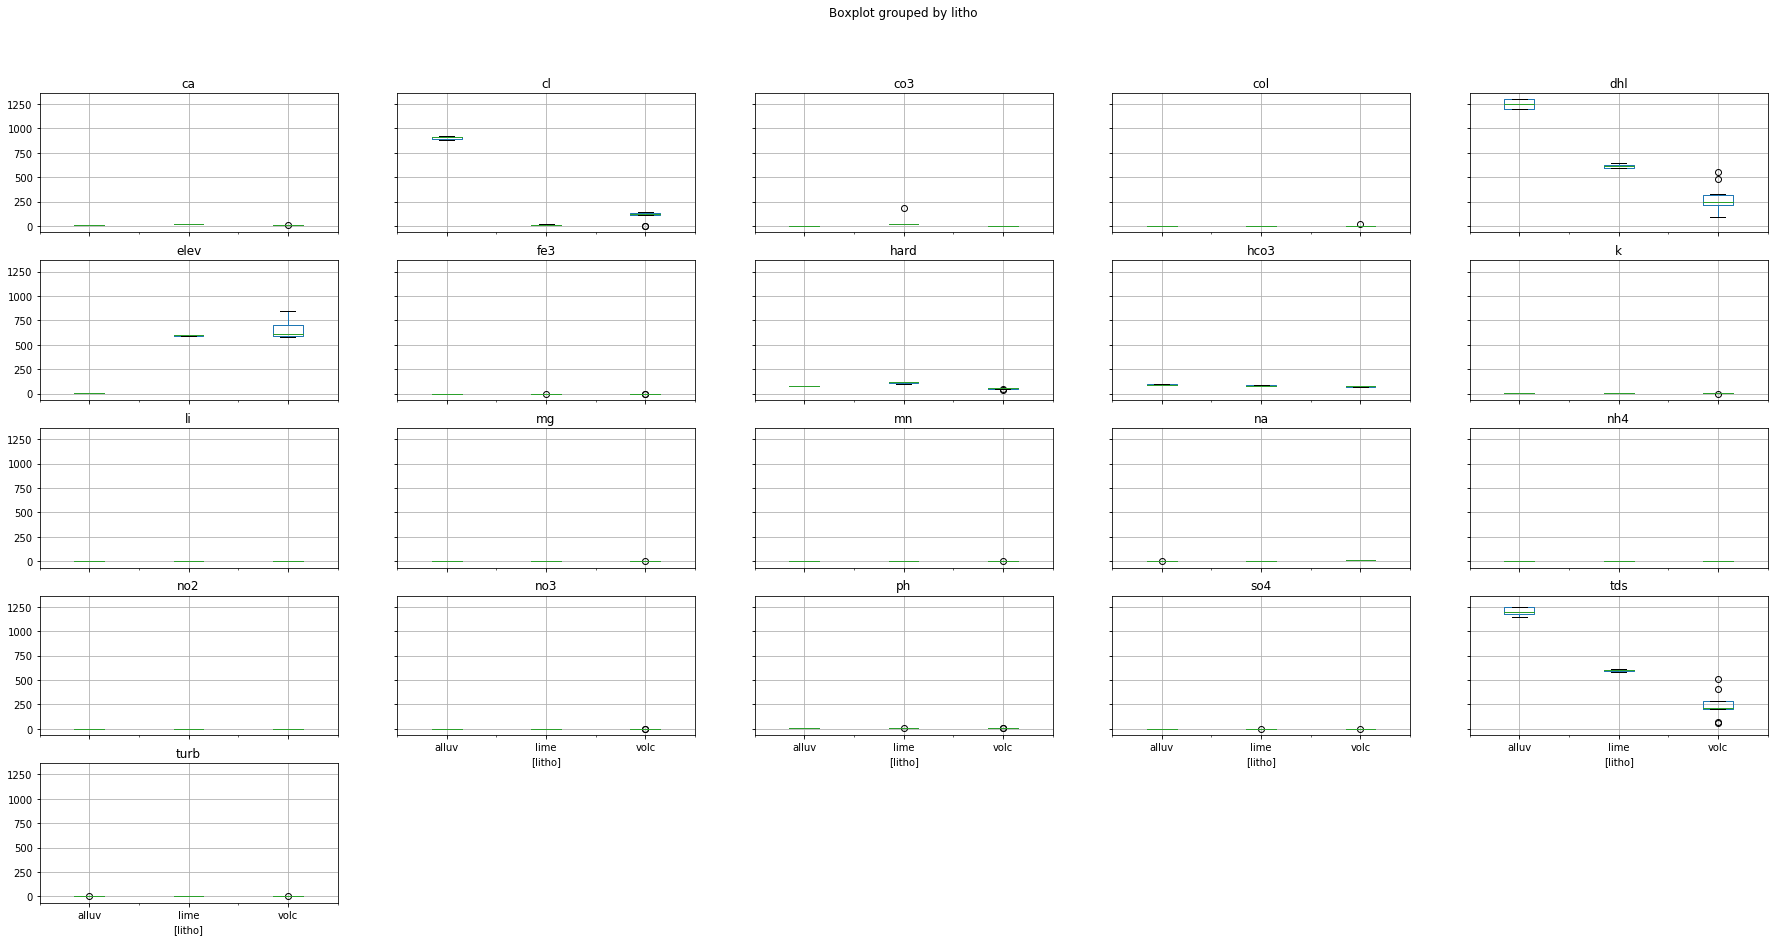

In [19]:
df.boxplot(by=['litho'], figsize=[30,15]) # creating boxplot grouped by lithology
plt.savefig('panel_box.png')

# Correlation matrix 

## omitting some non-numeric columns

In the PCA process, we will not be using non-numerical columns: `sample`, `litho`, `turb`, `col`, and `source`. Also, `li` (Lithium) column contains zeros. We will drop them. First we're going to see the correlation matrix. Here we build the matrix in table form and in plot form. 

In [33]:
df_cor = df.drop(['sample', 'litho', 'turb', 'col', 'source', 'li'], axis=1)
df_cor
list(df_cor)

['elev',
 'dhl',
 'tds',
 'ph',
 'hard',
 'ca',
 'mg',
 'fe3',
 'mn',
 'k',
 'na',
 'nh4',
 'co3',
 'hco3',
 'cl',
 'so4',
 'no2',
 'no3']

In [34]:
df_cor

,elev,dhl,tds,ph,hard,ca,mg,fe3,mn,k,na,nh4,co3,hco3,cl,so4,no2,no3
0,850,98,68,6.9,45.4,13.9,2.6,0.00,0.01,2.3,9.7,0.5,0.00,76.3,3.5,0.00,0.0,0.3
1,850,91,60,6.8,42.1,15.8,0.6,0.86,0.24,1.6,9.2,0.3,0.00,69.5,5.1,1.40,0.0,0.0
2,700,210,200,6.0,55.0,14.2,0.8,0.90,0.21,2.1,10.1,0.8,0.05,72.0,110.0,0.08,0.1,1.2
3,700,230,200,6.0,53.0,13.9,1.2,0.78,0.22,2.0,10.2,0.8,0.04,73.0,112.0,0.09,0.2,1.1
4,625,240,210,6.3,54.0,14.0,1.3,0.88,0.23,2.3,9.5,0.9,0.10,73.5,121.0,0.07,0.2,1.2
5,600,256,210,6.2,54.0,14.1,1.2,0.90,0.23,2.3,9.5,1.1,0.09,75.0,120.3,0.08,0.3,1.3
6,600,300,280,6.0,55.0,14.3,1.4,0.89,0.24,2.4,9.6,1.2,0.10,75.0,125.6,0.08,0.3,1.2
7,590,325,285,6.0,53.0,14.5,0.9,0.87,0.25,2.5,9.8,1.5,0.10,76.5,135.4,0.20,0.4,1.4
8,590,480,410,6.0,53.0,14.0,0.8,0.85,0.24,2.3,9.8,1.5,0.08,77.0,143.5,0.20,0.4,1.3
9,580,550,515,5.8,54.0,13.8,1.1,0.89,0.23,2.2,10.3,1.4,0.09,74.3,134.3,0.30,0.4,1.3


In [35]:
corr = df_cor.corr()
corr

,elev,dhl,tds,ph,hard,ca,mg,fe3,mn,k,na,nh4,co3,hco3,cl,so4,no2,no3
elev,1.000000,-0.957003,-0.954142,0.351124,-0.261246,0.614977,0.372277,-0.292380,-0.361425,-0.894264,0.474627,-0.866197,0.076602,-0.898516,-0.967574,-0.745283,-0.913760,-0.869995
dhl,-0.957003,1.000000,0.999393,-0.412267,0.476553,-0.408690,-0.390167,0.298008,0.366535,0.954259,-0.660693,0.727201,0.058615,0.960730,0.883810,0.700122,0.881999,0.747184
tds,-0.954142,0.999393,1.000000,-0.416460,0.490888,-0.396684,-0.388725,0.300459,0.366789,0.958134,-0.672465,0.715042,0.063719,0.961137,0.879134,0.694820,0.873798,0.736911
ph,0.351124,-0.412267,-0.416460,1.000000,-0.468608,-0.114696,0.462888,-0.683439,-0.664189,-0.355674,0.305431,-0.215287,-0.142988,-0.319596,-0.174137,0.127907,-0.488484,-0.272477
hard,-0.261246,0.476553,0.490888,-0.468608,1.000000,0.556750,-0.234158,0.315063,0.332010,0.619213,-0.930694,-0.215756,0.543726,0.577792,0.057374,-0.041426,0.223151,-0.122834
ca,0.614977,-0.408690,-0.396684,-0.114696,0.556750,1.000000,0.067952,0.108614,0.063431,-0.253429,-0.348241,-0.877326,0.535660,-0.305915,-0.766508,-0.641598,-0.556640,-0.829555
mg,0.372277,-0.390167,-0.388725,0.462888,-0.234158,0.067952,1.000000,-0.846951,-0.850999,-0.263820,0.277469,-0.270185,-0.008365,-0.267077,-0.306285,-0.439260,-0.407287,-0.275583
fe3,-0.292380,0.298008,0.300459,-0.683439,0.315063,0.108614,-0.846951,1.000000,0.969850,0.208926,-0.270610,0.151834,0.126295,0.161122,0.157944,0.167246,0.366406,0.187806
mn,-0.361425,0.366535,0.366789,-0.664189,0.332010,0.063431,-0.850999,0.969850,1.000000,0.282578,-0.313610,0.217483,0.141525,0.238419,0.229075,0.245751,0.423140,0.237185
k,-0.894264,0.954259,0.958134,-0.355674,0.619213,-0.253429,-0.263820,0.208926,0.282578,1.000000,-0.790417,0.583203,0.175016,0.986744,0.796820,0.572381,0.775493,0.622899


## scatter plot matrix

Then we visualize the correlation matrix in form of scatter plot matrix. We're going to see to types of scatter plot matrix. The first one builds on `pandas` function. The function automatically produces a separate window to contain the plot. The second plot, we define a custom-made function. 

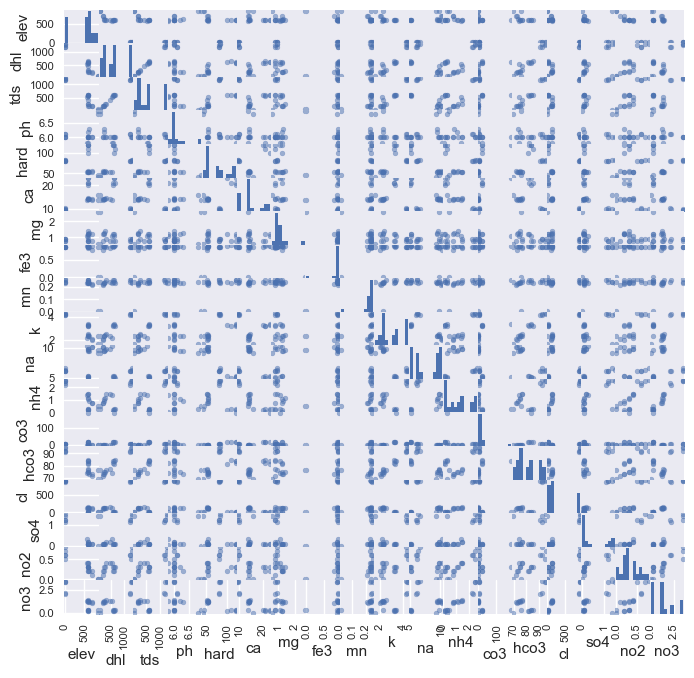

In [75]:
scatter_matrix(df_cor, figsize=(8,8))
plt.savefig('scatmat1.png')

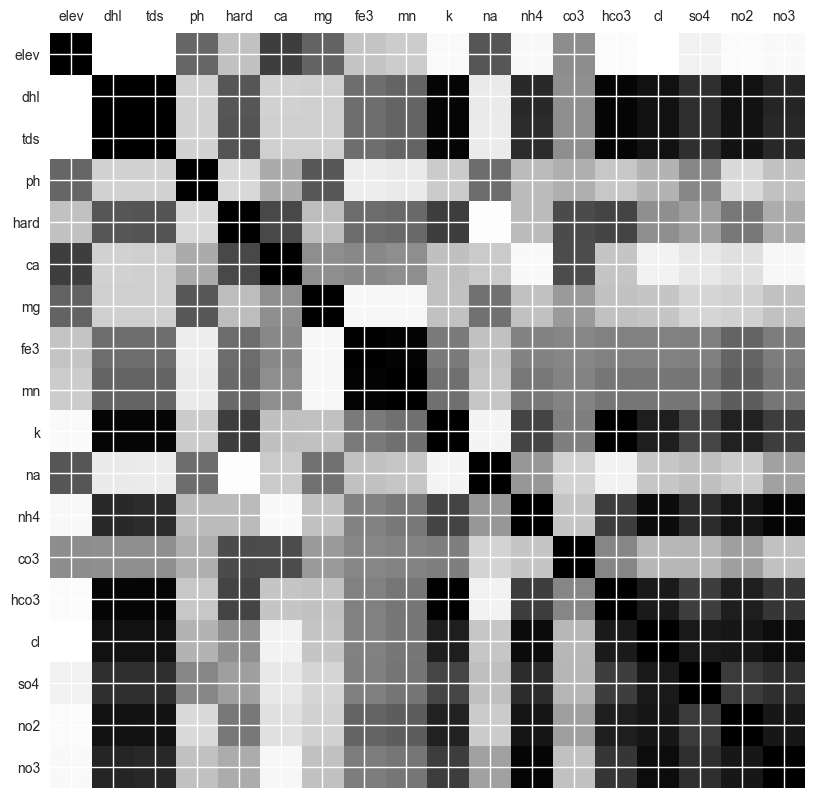

In [77]:
def plot_corr(df_cor, size=10):
    '''function to plot a graphical correlation matrix
    input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    import matplotlib.cm as cm # to load color map
    corr = df_cor.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df_cor, size = 10)
plt.savefig('scatmat2.png') # use this line only if you want to save the plot


# we find the following correlations

- TDS-DHL/EC with: K, HCO3, Cl, SO4, CO2, dan NO3
- K with HCO3 and Cl
- NH4 with Cl, SO4, NO2, dan NO3
- Cl with SO4, NO2 dan NO3
- NO2 with NO3

# multivariate analysis

we will use principal component analysis (PCA) and later on cluster analysis (CA) to separate water quality samples.

# steps

- scale or normalize of dataset using `scale()` function
- creating PCA model using `PCA()`
- evaluating PCA
- visualize PCA

# Multivariate analysis

Di sini kita mencoba menggunakan dua analisis multivariabel, Principal Component Analysis dan Cluster Analysis, untuk memisahkan sampel air berdasarkan karakter sifat fisik dan kimianya. Kami menggunakan library Scikit-Learn untuk melakukan ini.

## Principal component analysis (PCA)
Dalam tahap ini kami menggunakan fungsi `PCA` dari Pandas. Sebelumnya proses standardisasi atau normalisasi perlu dilakukan dengan fungsi `scale`. Hasil dari fungsi `PCA` adalah nilai per variabel terhadap komponen 1 dan komponen 2. Jadi nantinya 18 variabel yang diukur akan dimasukkan ke dalam dua komponen utama (PC1 dan PC2). Dengan demikian akan muncul dua komponen yang merupakan transformasi dari 18 variabel awal. Berbekal dua komponen besar dan bukan 18 variabel terpisah, akan memudahkan kami untuk melakukan interpretasi lebih lanjut. Karena sebab inilah, maka PCA adalah salah satu teknik pengurangan dimensi atau _dimension reduction_.   

### Creating PCA model and fitting
Tahap pertama adalah melakukan normalisasi dengan `scale()` dan kemudian menjalankan proses PCA dengan `pca()`. Dalam proses PCA, data yang tadinya terdiri dari 18 variabel (atau sumbu atau dimensi), ditransformasi menjadi beberapa komponen saja. Biasanya fungsi `pca()` akan mengajukan empat komponen untuk dipilih, tapi pengguna bisa saja menentukan berapa jumlah komponen yang dihasilkan sejak awal, misalnya 2 komponen.

In [78]:
# scaling the dataset
standardisedX = scale(df_cor) # scale() from sklearn
standardisedX = pd.DataFrame(standardisedX, index=df_cor.index, columns=df_cor.columns)

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(df_cor)
existing_2d = pca.transform(df_cor)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = df_cor.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d
existing_df_2d.to_csv('us_pc.csv')

In [61]:
print(pca.explained_variance_ratio_) 

[ 0.95121667  0.04443762]


### Evaluating PCA fit
Di sini kami mengevaluasi model PCA yang telah dihasilkan, yaitu dengan menghitung dan memplot jumlah komponen yang mampu menangkap variansi kumulatif terbesar dari data yang mampu dijelaskan oleh model (_cumulative explained variance_).

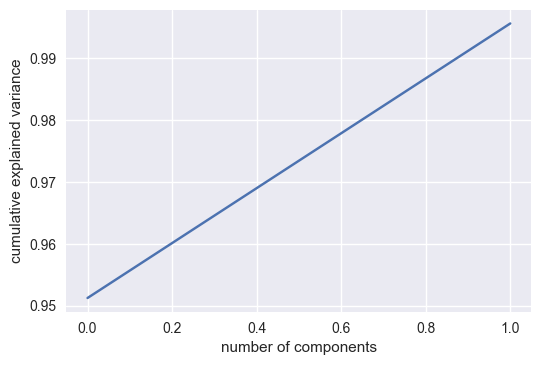

In [81]:
cumsum = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


## calculating `eigenvalue`

This function is borrowed from this [source](http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#loadings-for-the-principal-components) for calculating `eigenvalue`.

In [82]:
pca = PCA(n_components=2, svd_solver='full').fit(standardisedX)
pca.fit = pca.fit(df_cor)

In [83]:
X_transformed = pca.fit_transform(df_cor)

# We center the data and compute the sample covariance matrix.
df_cor_centered = df_cor - np.mean(df_cor, axis=0)
cov_matrix = np.dot(df_cor_centered.T, df_cor_centered) / 20
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

521036.295628
521036.295628
24341.0491775
24341.0491775


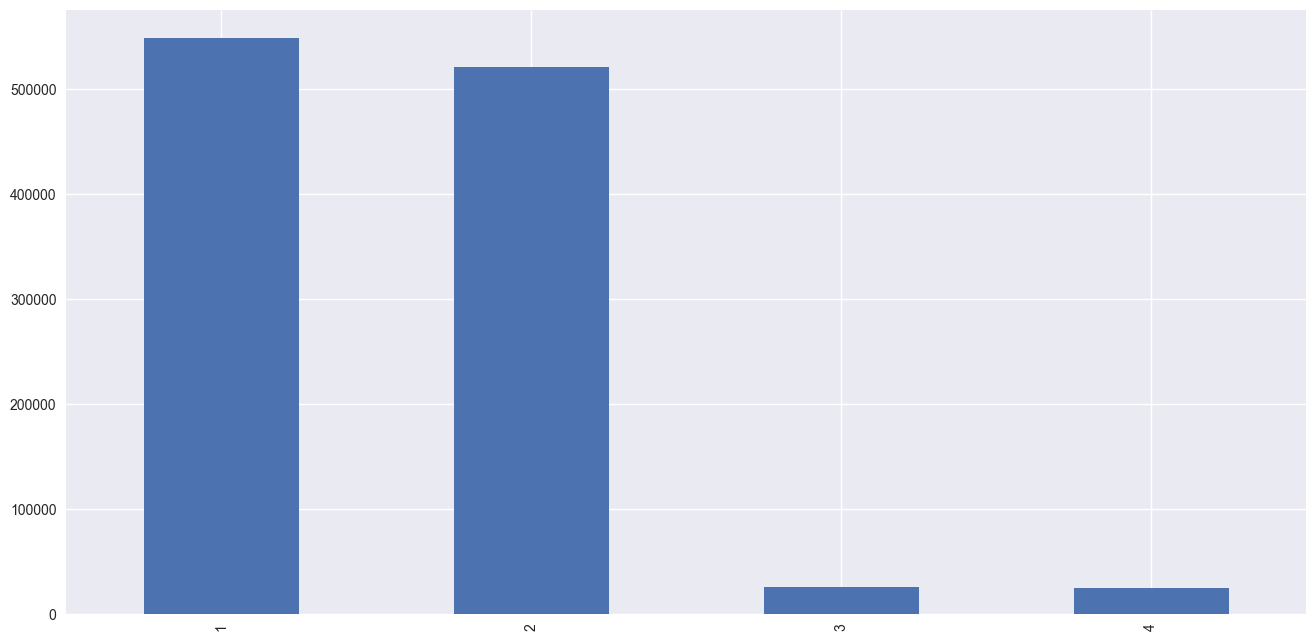

In [84]:
type(eigenvalue)
eigval = pd.Series({2: 521036.29562818405, 1: 548459.2585559834, 4: 24341.049177525907, 3: 25622.157028974627})
eigval.plot.bar(figsize=(16,8))

## ploting loading/vector

Here we plot loadings (R's term) or vectors (python's term) of the PCA model.

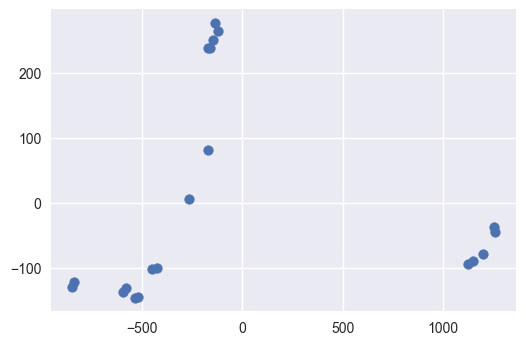

In [86]:
pcdf = pd.DataFrame(data = X_transformed, columns = ['PC1', 'PC2'])
pcdf
fig, ax = plt.subplots()
ax.scatter(x=pcdf["PC1"], y=pcdf["PC2"])

PCA pada dasarnya adalah alat untuk mengurangi dimensi (baca: variabel) atau *dimension reduction*. Bila semula kami punya 18 variabel, kemudian ditransformasi oleh PCA menjadi dua variabel, berupa `komponen principal (PC)` (*principal component*), seperti dapat dilihat pada diagram balok di atas. Sekarang kita lihat variabel apa saja yang berperan membentuk PC 1 dan PC2.

Plot di atas memperlihatkan lompatan nilai eigen value yang sangat besar antara PC2 dan PC3. Atas dasar itu, kami memilih analisis dilanjutkan pada PC1 dan PC2 untuk menangkap variansi terbesar dari data yang ada.

### Visualizing PCA fit
Di sini kami membuat beberapa visualisasi model PCA menggunakan _scatter plot_ sederhana.

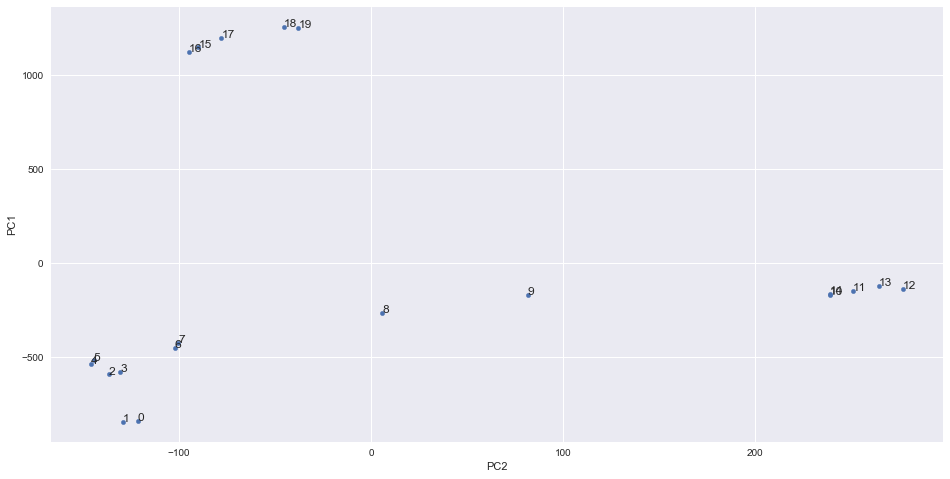

In [279]:
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
for i, sample in enumerate(existing_df_2d.index):
    ax.annotate(sample, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))

Perhatikan plot di atas. Index data menggunakan no urut. Kami ingin menambahkan identitas pada tiap titik data. Untuk itu kami tambahkan kolom `litho` dan `sampleid` ke dalam `existing_df_2d` (dataframe hasil fit PCA). Kemudian kami set kolom `sampleid` sebagai index.   

In [280]:
lithoid = pd.DataFrame(df['litho']) 
type(lithoid)
sampleid = pd.DataFrame(df['sample']) 
type(sampleid)
existing_df_2d = lithoid.join(existing_df_2d)

In [281]:
existing_df_2d

,litho,PC1,PC2
0,volc,-838.951592,-121.561683
1,volc,-846.664166,-129.334472
2,volc,-593.633184,-136.570959
3,volc,-581.479636,-130.548613
4,volc,-536.608599,-145.809350
5,volc,-518.134771,-144.512845
6,volc,-452.203972,-102.269583
7,volc,-426.850450,-100.392910
8,volc,-266.902302,5.764896
9,volc,-170.003433,81.508510


In [282]:
existing_df_2d = pd.concat([sampleid, existing_df_2d], axis=1)
existing_df_2d

,sample,litho,PC1,PC2
0,Pang1,volc,-838.951592,-121.561683
1,Pang2,volc,-846.664166,-129.334472
2,Bdg1,volc,-593.633184,-136.570959
3,Bdg2,volc,-581.479636,-130.548613
4,Bdg3,volc,-536.608599,-145.809350
5,Bdg4,volc,-518.134771,-144.512845
6,Bdg5,volc,-452.203972,-102.269583
7,Bdg6,volc,-426.850450,-100.392910
8,Bdg7,volc,-266.902302,5.764896
9,Bdg8,volc,-170.003433,81.508510


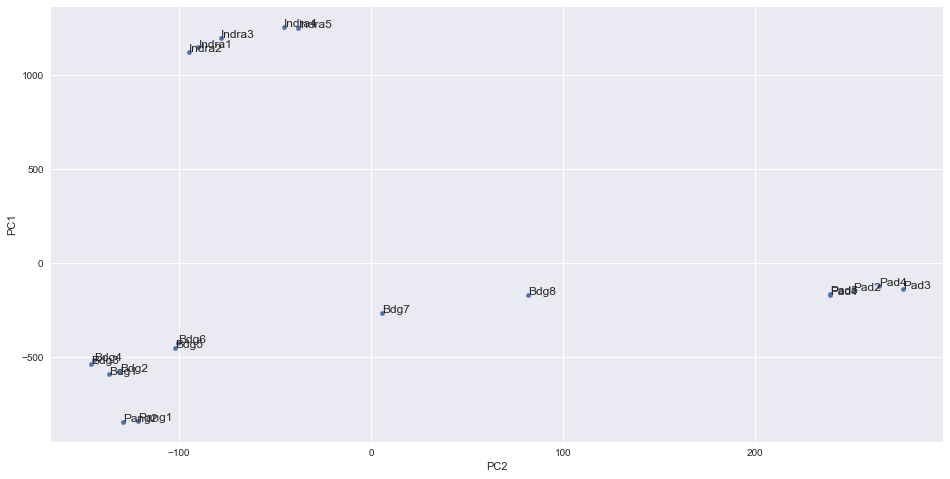

In [283]:
existing_df_2d.set_index('sample', inplace=True)
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
for i, sample in enumerate(existing_df_2d.index):
    ax.annotate(sample, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))

# results and discussions

we should see separation between samples: 

- group 1 strong `Cl`
- group 2 strong `CO3`
- group 3 strong contaminations of NO2, NO3, NH4?
- group 4 strong `SO4` 

# Hasil dan diskusi

Dari plot di atas dapat dilihat bahwa sampel dari kawasan pantai Indramayu (Indra1 - Indra5) dan sampel dari Padalarang (Pad1 - Pad4) terpisah dari sampel endapan gunung api (Bdg1 - Bdg8) dan Pangalengan (Pang1 dan Pang2). Kemungkinan besar dari nilai Cl nya untuk sampel dari daerah pesisi Indramayu dan karena tingginya nilai CO3 atau HCO3 untuk sampal-sampel dari Padalarang. Namun demikian, model ini akan jadi berbeda bila ada data air panas jenis klorida yang masuk ke dalam plot. Demikian pula untuk sampel air dari akuifer endapan volcanik Bdg7 dan Bdg8 memisahkan dari sampel dari endapan gunung api lainnya berkode Bdg1-Bdg6 dan Pang1-Pang2. Ini menarik bila dilihat bahwa sampel Bdg7 dan Bdg8 terletak lebih mendekati Kota Bandung dibanding sampel-sampel lainnya. Kedua sampel tersebut telah mendapatkan pengaruh dari komponen NH4, NO2 dan NO3, yang menjadi tolok ukur adanya aktivitas manusia. Apakah ini berarti mata air tersebut telah mengalami pencampuran dari resapan limbah domestik atau pertanian dari permukaan? Memerlukan data dan observasi lebih rinci untuk menjawabnya.   

# conclusion

we can divide the `toy samples` in to 3 groups:

- **group 1** samples from coastal area (eg: Indramayu)
- **group 2** samples from limestone area (eg: Padalarang)
- **group 3** samples from `inner city-lowland` volcanic area (eg: Bandung)
- **group 4** samples from `outer city-highland` volcanic area (eg: Pangalengan)

# Kesimpulan

Dari proses ini dapat dilihat bahwa kami berhasil menguraikan sampel-sampel kualitas air yang dimiliki menjadi beberapa bagian, yakni __Kelompok 1__: sampel dari pesisir Indramayu; __Kelompok 2__: sampel dari kawasan batugamping Padalarang; serta __Kelompok 3__: sampel dari endapan gunungapi Bandung dan Pangalengan. Kelompok 3 masih dapat dibagi lagi menjadi sampel yang berada di bagian hulu yang relatif belum mendapatkan pengaruh aktivitas manusia, dan sampel dari bagian hilir (mungkin dekat dengan kawasan pemukiman) yang mungkin telah menerima pengaruh dari aktivitas manusia. Harapan kami, metode ini dapat diaplikasikan untuk analisis sampel data kualitas air hipertermal guna mengidentifikasi proses yang terjadi, untuk membedakannya dari air dingin (mesotermal), atau mengidentifikasi ada atau tidaknya pengaruh sistem geotermal kepada sistem air tanah yang digunakan oleh penduduk sekitarnya.

## take home message

- sometimes data might behave beyond our visual recognition. 
- this multivariable technique might give you more insight from your data.
- we hope this method can assist you to foreseen the unseen in your data.
- all resources are accessible via [GitHub repository](https://github.com/dasaptaerwin/iigw2018).

# should anyone be interested in this `mess`, here's my contact: 

- email: `dasaptaerwin at gmail`
- twitter handle: `@dasaptaerwin`